In [1]:
%load_ext autoreload
%autoreload 2

## import

In [3]:
import os
from pathlib import Path
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import torch
from easydict import EasyDict as edict

from src.config import load_config
from src.sweep_config import load_sweep_config
from src.sweep import random_search
from src.visu import plot_histories_overlay
from src.report import save_sweep_best_summary

# from src.models import build_mlp
# from src.metrics import DEFAULT_REGRESSION_METRICS
# from src.trainer import Trainer, build_optimizer
# from src.data_module.dataset import make_train_val_loaders
# from src.utils import print_tensor, count_params
# from src.visu import plot_history, plot_histories_overlay

In [4]:
base_cfg = load_config("config/base_config.yaml")
sweep_cfg = load_sweep_config("config/sweep_config.yaml")

result = random_search(
    base_cfg=base_cfg,
    sweep_cfg=sweep_cfg
)



=== Random search trial 1/3 ===
Experiment dir: runs/cli-standalone-sweep-run/trials/trial_000
Sampled params: {'model.hidden_dims': [64, 64], 'model.dropout': 0.0, 'optim.lr': 0.0012455466690609286, 'optim.weight_decay': 5.428446492629877e-06}
[Epoch 5] train_loss=0.0898 | val_loss=0.1201 | train_mse=0.0898, train_mae=0.2303, train_rmse=0.2996, train_r2=0.9858 | val_mse=0.1201, val_mae=0.2283, val_rmse=0.3465, val_r2=0.9816
[Epoch 10] train_loss=0.0757 | val_loss=0.1091 | train_mse=0.0757, train_mae=0.2123, train_rmse=0.2751, train_r2=0.9880 | val_mse=0.1091, val_mae=0.2161, val_rmse=0.3303, val_r2=0.9832
[Epoch 15] train_loss=0.0671 | val_loss=0.1007 | train_mse=0.0671, train_mae=0.2014, train_rmse=0.2591, train_r2=0.9894 | val_mse=0.1007, val_mae=0.2070, val_rmse=0.3173, val_r2=0.9845
[Epoch 20] train_loss=0.0578 | val_loss=0.0913 | train_mse=0.0578, train_mae=0.1872, train_rmse=0.2404, train_r2=0.9909 | val_mse=0.0913, val_mae=0.2024, val_rmse=0.3022, val_r2=0.9860

Final Validati

In [5]:
result.keys()

dict_keys(['best_value', 'best_cfg', 'best_result', 'best_trial_idx', 'trials', 'sweep_log_path'])

In [9]:
trial_ix = 0
result['trials'][trial_ix]['result']['val_metrics']

{'mse': 0.09130065888166428,
 'mae': 0.2023637443780899,
 'rmse': 0.30215999484062195,
 'r2': 0.9859761595726013}

In [33]:
save_sweep_best_summary(result, sweep_cfg, base_cfg)


Best Trial Summary
Trial Index: 0
Best r2 value: 0.9861140251159668
Best val loss: 0.09040300756692886
Best val metrics:
{
  "mse": 0.0904030129313469,
  "mae": 0.20171624422073364,
  "rmse": 0.30067095160484314,
  "r2": 0.9861140251159668
}

Best Config:

model:
  input_dim: 7
  hidden_dims:
  - 64
  - 64
  activation: relu
  dropout: 0.0
  output_dim: 1
data:
  dataset: toy
  n_samples: 4000
  noise_std: 0.2
  val_ratio: 0.2
  batch_size: 64
  seed: 42
optim:
  name: adam
  lr: 0.0012455466690609286
  weight_decay: 5.428446492629877e-06
  momentum: 0.9
train:
  num_epochs: 20
  log_interval: 5
  device: null
logging:
  root_dir: ./runs
  experiment_name: mlp_regression_exp1/trials/trial_000
  subdir_checkpoints: checkpoints
  subdir_logs: logs
  subdir_hparams: hparams
checkpoint:
  save_best: true
  save_last: false
  monitor: val_loss
  mode: min
cv:
  n_splits: 1
  shuffle: true
  seed: 42


[INFO] Best sweep summary saved to: runs/mlp_regression_exp1/sweep_best_summary.txt


'==================================\nBest Trial Summary\n==================================\nTrial Index: 0\nBest r2 value: 0.9861140251159668\nBest val loss: 0.09040300756692886\nBest val metrics:\n{\n  "mse": 0.0904030129313469,\n  "mae": 0.20171624422073364,\n  "rmse": 0.30067095160484314,\n  "r2": 0.9861140251159668\n}\n\nBest Config:\n\nmodel:\n  input_dim: 7\n  hidden_dims:\n  - 64\n  - 64\n  activation: relu\n  dropout: 0.0\n  output_dim: 1\ndata:\n  dataset: toy\n  n_samples: 4000\n  noise_std: 0.2\n  val_ratio: 0.2\n  batch_size: 64\n  seed: 42\noptim:\n  name: adam\n  lr: 0.0012455466690609286\n  weight_decay: 5.428446492629877e-06\n  momentum: 0.9\ntrain:\n  num_epochs: 20\n  log_interval: 5\n  device: null\nlogging:\n  root_dir: ./runs\n  experiment_name: mlp_regression_exp1/trials/trial_000\n  subdir_checkpoints: checkpoints\n  subdir_logs: logs\n  subdir_hparams: hparams\ncheckpoint:\n  save_best: true\n  save_last: false\n  monitor: val_loss\n  mode: min\ncv:\n  n_splits

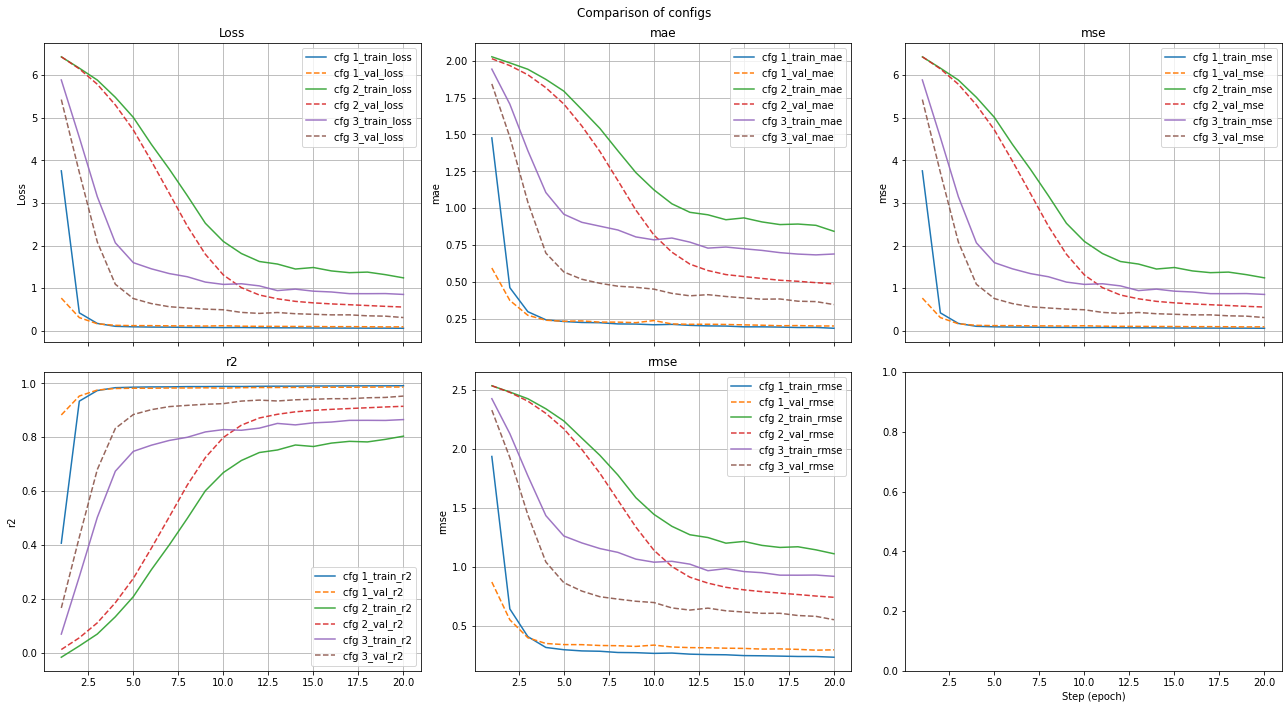

In [34]:
# Suppose you ran multiple experiments:
histories = [
    result['trials'][i]['result']['history']
    for i in range(len(result['trials']))
]

fig = plot_histories_overlay(
    histories,
    labels=[f"cfg {i+1}" for i in range(len(histories))],
    metrics_to_plot=None,             # or ["rmse", "r2"]
    suptitle="Comparison of configs",
    n_cols=3,
)
plt.tight_layout()
plt.show()

In [ ]:
# ####### THEN, WE CAN PERFORM ANALYSIS: 

# import json
# records = []
# with open("random_search_logs.jsonl", "r", encoding="utf-8") as f:
#     for line in f:
#         records.append(json.loads(line))

# # Now 'records' is a list of {trial, params, objective}